In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..')) + '/src/'
if module_path not in sys.path:
    sys.path.insert(0, module_path)
import numpy as np
from matplotlib import pyplot as plt

import torch
from pupil import ScalarCartesianPupil, ScalarPolarPupil, VectorialCartesianPupil, VectorialPolarPupil
from propagator import ScalarCartesianPropagator, ScalarPolarPropagator, VectorialCartesianPropagator, VectorialPolarPropagator

%load_ext autoreload
%autoreload 2

ImportError: attempted relative import with no known parent package

In [ ]:
n_pix_pupil = 1024
n_pix_psf = 201
NA = 1.4
wavelength = 632
fov = 1500
defocus = 0
n_defocus = 1

# pupil1 = ScalarCartesianPupil(n_pix_pupil)
# pupil2 = ScalarPolarPupil(n_pix_pupil)
pupil3 = VectorialCartesianPupil(e0x=1, e0y=0,n_pix_pupil=n_pix_pupil)
pupil4 = VectorialPolarPupil(e0x=1, e0y=0, n_pix_pupil=n_pix_pupil)

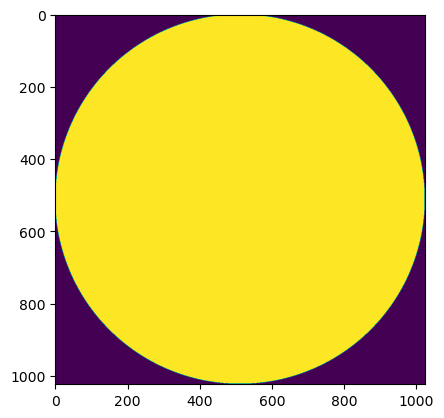

In [21]:
plt.figure()
plt.imshow(np.abs(pupil3.field[0,0,:,:]))

tensor(1.0466)
torch.Size([1, 3, 201, 201])


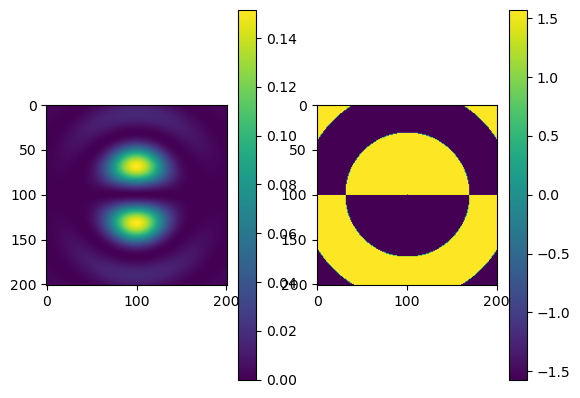

In [23]:
propagator4 = VectorialPolarPropagator(pupil4, n_pix_psf=n_pix_psf, wavelength=wavelength, NA=NA, fov=fov, defocus_min=0, defocus_max=defocus, n_defocus=n_defocus)
field4 = propagator4.compute_focus_field()
print(torch.max(torch.abs(field4)))

idx = 0
ax_idx = 2
print(field4.shape)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(field4[idx,ax_idx,...].squeeze())**2)
plt.colorbar()
plt.subplot(122)
plt.imshow(torch.angle(field4[idx,ax_idx,...].squeeze()))
plt.colorbar()
plt.show()

far_field torch.Size([1, 1, 1024, 1024])
correction_factor torch.Size([1, 1, 1024, 1024])
defocus_filters torch.Size([1, 1, 1024, 1024])
tensor(nan)
torch.Size([1, 1, 201, 201])


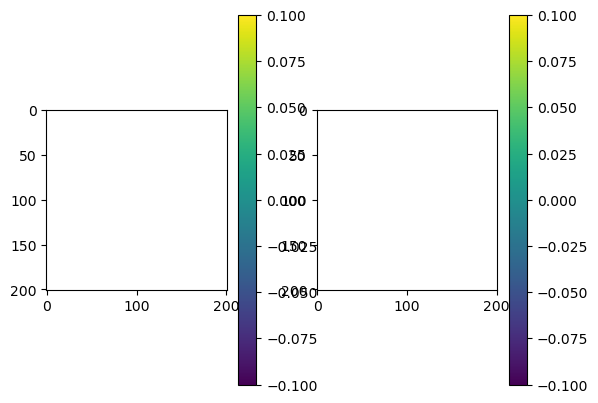

In [26]:
propagator3 = VectorialCartesianPropagator(pupil3, n_pix_psf=n_pix_psf, wavelength=wavelength, NA=NA, fov=fov, defocus_min=0, defocus_max=defocus, n_defocus=n_defocus)

field3 = propagator3.compute_focus_field()
print(torch.max(torch.abs(field3)))

idx = 0
print(field3.shape)
plt.figure()
plt.subplot(121)
plt.imshow(torch.abs(field3[idx,...].squeeze())**2)
plt.colorbar()
plt.subplot(122)
plt.imshow(torch.angle(field3[idx,...].squeeze()))
plt.colorbar()
plt.show()